# Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

2024-09-21 12:31:05.737790: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 12:31:05.741210: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 12:31:05.751748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-21 12:31:05.766752: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-21 12:31:05.771023: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-21 12:31:05.784964: I tensorflow/core/platform/cpu_feature_gu

# Load the dataset

In [2]:
data = pd.read_csv('/workspaces/swiss-data-science-demos-/ml_model_development/data/drug_trial_data.csv')


# Display first few rows of the data

In [3]:
data.head()

,trial_id,patient_id,age,gender,drug_dosage,side_effects,success_indicator,genetic_marker,baseline_health
0,1,25795,32,Male,79.238014,0,0,0,0.495509
1,2,10860,34,Female,71.927428,1,1,0,0.106619
2,3,86820,57,Female,129.231858,0,1,0,0.345581
3,4,64886,35,Female,214.169121,0,1,0,0.148385
4,5,16265,72,Female,73.061350,1,1,0,0.636040


# Data exploration: Visualize the distribution of the 'success_indicator'

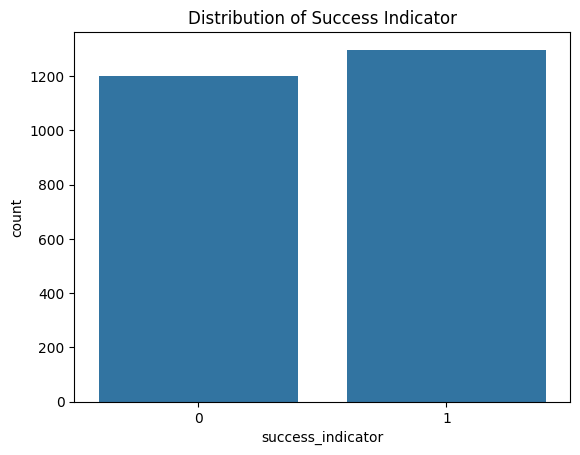

In [4]:
sns.countplot(x='success_indicator', data=data)
plt.title('Distribution of Success Indicator')
plt.show()

1. Convert Categorical Data to Numeric

You can convert categorical values into numeric representations, such as using one-hot encoding for gender ('Male', 'Female').

# Visualize correlation between features

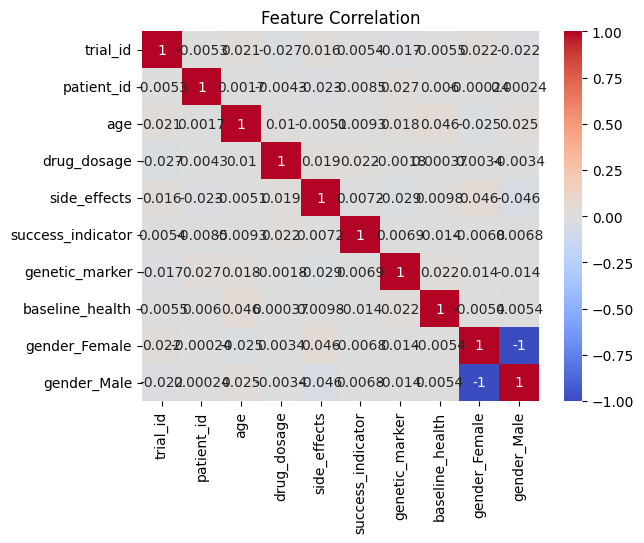

In [9]:
# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data)

# Now calculate the correlation
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Select features and target

In [10]:
X = data[['age', 'drug_dosage', 'side_effects', 'genetic_marker', 'baseline_health']]
y = data['success_indicator']

# Split data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale features

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a neural network model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model

In [15]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5045 - loss: 0.6934 - val_accuracy: 0.5100 - val_loss: 0.6966
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5226 - loss: 0.6900 - val_accuracy: 0.5150 - val_loss: 0.6987
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5278 - loss: 0.6883 - val_accuracy: 0.5075 - val_loss: 0.6989
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5479 - loss: 0.6869 - val_accuracy: 0.5175 - val_loss: 0.7004
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5371 - loss: 0.6877 - val_accuracy: 0.5050 - val_loss: 0.7016
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5242 - loss: 0.6889 - val_accuracy: 0.5000 - val_loss: 0.7001
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5615 - loss: 0.6834 - val_accuracy: 0.4800 - val_loss: 0.7032
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5422 - loss: 0.6882 - val_accuracy: 0.4825 - val_loss:

# Visualize training history

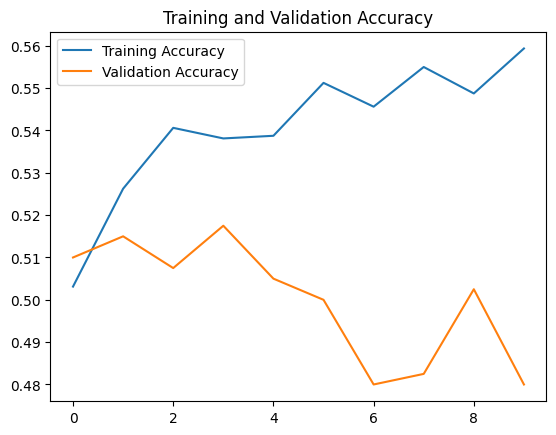

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Evaluate the model

In [17]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Accuracy: 48.40%
